In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn

C:\Anaconda\envs\py35\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
from copy import deepcopy

In [3]:
def modificar_matriz(m):
    for i in range(10):
        m[i][i] *= 15
    return m

def modificar_tasas(tasa):
    tasa[tasa > 0] = tasa[tasa > 0] * 20
    return tasa

def modificar_condiciones0(c0):
    c0 = c0 * 10
    return c0

In [4]:
Dispersion = {"b": 0.3,
              "m": 1,
              "i": 1}

Mortalidad = {"b": 0,
              "m": 0.6,
              "i": 0.9}

matriz_interacciones = np.loadtxt("../proyectof/comunidades/2015-01-27-155113-eq-m.txt")
tasas_reproduccion = np.loadtxt("../proyectof/comunidades/2015-01-27-155113-eq-v.txt")
condiciones_iniciales = np.loadtxt("../proyectof/comunidades/2015-01-27-155113-eq-c.txt")
t_total = 1000
pasos_mm = 2

In [5]:
matriz_interacciones2 = deepcopy(matriz_interacciones)
tasas_reproduccion2 = deepcopy(tasas_reproduccion)
condiciones_iniciales2 = deepcopy(condiciones_iniciales)

matriz_interacciones2 = modificar_matriz(matriz_interacciones2)
tasas_reproduccion2 = modificar_tasas(tasas_reproduccion2)
condiciones_iniciales2 = modificar_condiciones0(condiciones_iniciales2)

In [6]:
paisaje = np.load("../proyectof/paisajes_h2.npy")

In [7]:
paisaje = paisaje[0]


In [8]:
%matplotlib notebook

In [9]:
%run modelo.py

In [20]:
test = matriz_agroecologica(paisaje.tolist(), 
                            matriz_interacciones2, 
                            tasas_reproduccion, 
                            condiciones_iniciales, 
                            t_total, 
                            Dispersion, 
                            Mortalidad, 
                            pasos_mm)

In [64]:
seaborn.heatmap(test[-1, :, :, 2])

In [12]:
%run medidas_biodiversidad.py

In [21]:
poblacion = test

In [22]:
biomasa_min = 0.0001

In [23]:
# Biomasa paisaje
biomasa = [None] * len(poblacion)
riqueza = [None] * len(poblacion)

for i in range(len(poblacion)):
    biomasa[i] = riqueza_paisaje(poblacion, i, biomasa_min)[0] 
    riqueza[i] = riqueza_paisaje(poblacion, i, biomasa_min)[1]

In [24]:
riqueza_milpa = [None] * len(poblacion)
biomasa_milpa = [None] * len(poblacion)

for i in range(len(poblacion)):
    riqueza_milpa[i] = riqueza_agricola(poblacion, paisaje, i, biomasa_min)[1]   
    biomasa_milpa[i] = riqueza_agricola(poblacion, paisaje, i, biomasa_min)[0]   

<IPython.core.display.Javascript object>


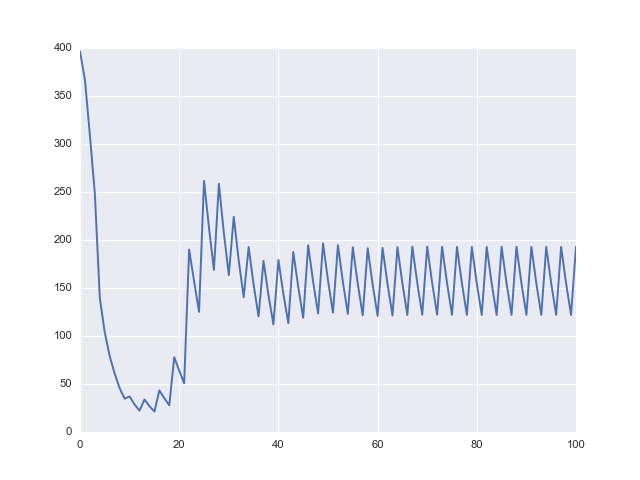

(0, 100)

In [28]:
fig = plt.figure()
plt.plot(range(len(riqueza_milpa)), biomasa)
plt.xlim(0, 100)

In [36]:
biomasa_celda = medidas_por_celda(poblacion, -2, biomasa_min)[0]
riqueza_celda = medidas_por_celda(poblacion, -2, biomasa_min)[1]

<IPython.core.display.Javascript object>


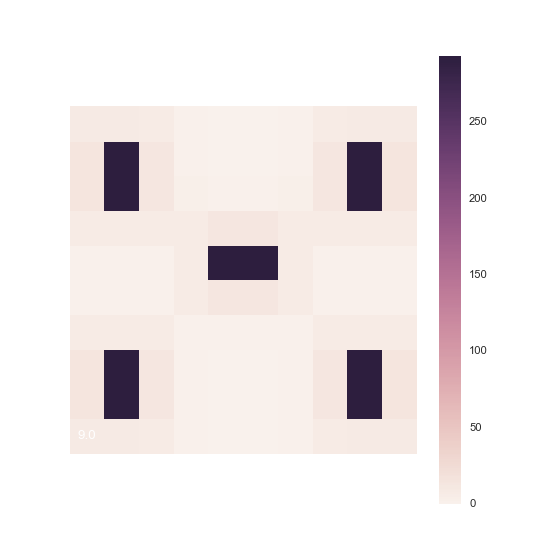

In [38]:
fig = plt.figure(figsize=(7,7))
seaborn.heatmap(biomasa_celda, yticklabels=False,
               xticklabels=False, vmin = 0.0, annot=True, fmt=".1f", square=True) 

#seaborn.heatmap(poblacion[-2, :, :, 1], yticklabels=False,
#               xticklabels=False, vmin = 0.0, annot=True, fmt=".1f", square=True) 
plt.show() 